In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Studying text
There are problems, no matter what you use:
- Twitter is not a representation of the real population
- Google NGrams: http://www.wired.com/2015/10/pitfalls-of-studying-language-with-google-ngram/

# Sentiment analysis
Assumes a bag-of-words model: The other does not matter
We use the work from Dodds et al. http://www.pnas.org/content/112/8/2389.abstract
Each word has a hapiness level, the hapiness of the text is the average hapiness of all the words involved

In [87]:
def get_happiness_raw(string_study,lang="english"):
    """
    Available languages: german      portuguese arabic   hindi   russian chinese  indonesian  spanish english  korean      urdu french   pashto
    """

    from labMTsimple.storyLab import emotionFileReader, emotion, stopper, emotionV
    labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang=lang,returnVector=True)

    #Then we can score the text and get the word vector at the same time:
    Valence,Fvec = emotion(string_study,labMT,shift=True,happsList=labMTvector)
   
    return Valence

def get_happiness_delete_neutral(string_study,lang="english"):
    """
    Available languages: german      portuguese arabic   hindi   russian chinese  indonesian  spanish english  korean      urdu french   pashto
    """

    from labMTsimple.storyLab import emotionFileReader, emotion, stopper, emotionV
    labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang=lang,returnVector=True)

    #Then we can score the text and get the word vector at the same time:
    Valence,Fvec = emotion(string_study,labMT,shift=True,happsList=labMTvector)
    StoppedVec = stopper(Fvec,labMTvector,labMTwordList,stopVal=1.0)
    Valence = emotionV(StoppedVec,labMTvector)
    
    return Valence


countries_happ = []
languages_happ = []
countries = []
with open("./data/country_language.csv") as f:
    for line in f:
        try: country,language = line.split("\t")
        except: continue
        countries_happ.append(get_happiness_raw(country))
        languages_happ.append(get_happiness_raw(language))
        countries.append(country)





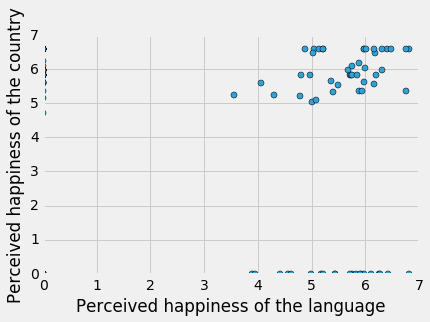

In [58]:
import pylab as plt
plt.plot(countries_happ,languages_happ,"o")
plt.ylabel("Perceived happiness of the language")
plt.xlabel("Perceived happiness of the country")
plt.show()



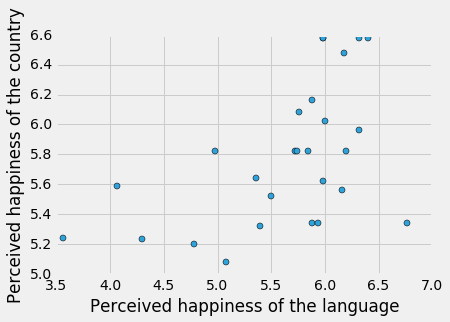

In [83]:
countries_happ_proc = []
languages_happ_proc = []
for i in range(len(countries_happ)):
    if countries_happ[i] > 0 and languages_happ[i] > 0:
        countries_happ_proc.append(countries_happ[i])
        languages_happ_proc.append(languages_happ[i])
        
plt.plot(countries_happ_proc,languages_happ_proc,"o")
plt.ylabel("Perceived happiness of the language")
plt.xlabel("Perceived happiness of the country")
plt.show()


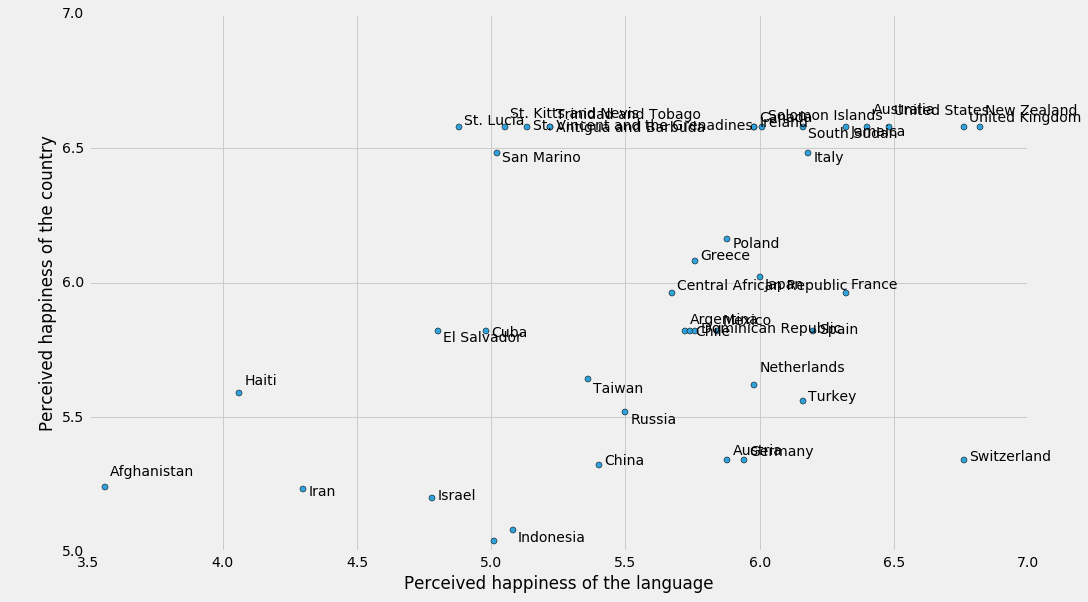

6.2


In [81]:
from random import random

countries_happ_proc = []
languages_happ_proc = []
countries_proc = []
for i in range(len(countries_happ)):
    if countries_happ[i] > 0 and languages_happ[i] > 0:
        countries_happ_proc.append(countries_happ[i])
        languages_happ_proc.append(languages_happ[i])
        countries_proc.append(countries[i])

plt.figure(figsize=(15,9))
for (x,y,name) in list(zip(countries_happ_proc,languages_happ_proc,countries_proc)):
    plt.annotate(name,(x+0.02,y+random()/10-0.05))
    
plt.plot(countries_happ_proc,languages_happ_proc,"o")
plt.ylabel("Perceived happiness of the language")
plt.xlabel("Perceived happiness of the country")
plt.ylim((5,7))
plt.show()


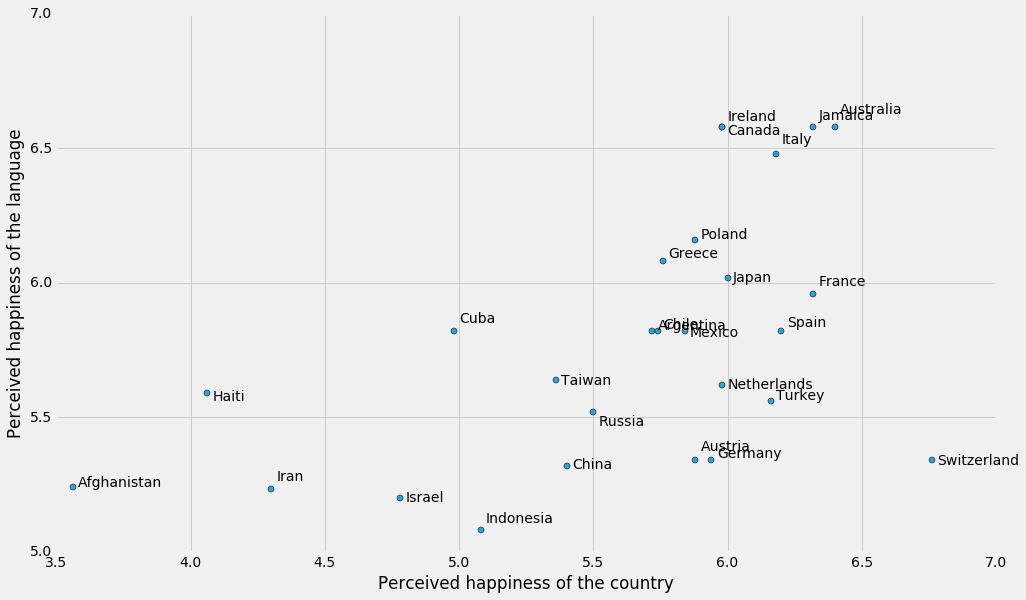

6.58
6.76


In [90]:
from random import random

countries_happ_proc = []
languages_happ_proc = []
countries_proc = []
for i in range(len(countries_happ)):
    if countries_happ[i] > 0 and languages_happ[i] > 0 and len(countries[i].split()) == 1:
        countries_happ_proc.append(countries_happ[i])
        languages_happ_proc.append(languages_happ[i])
        countries_proc.append(countries[i])

plt.figure(figsize=(15,9))
for (x,y,name) in list(zip(countries_happ_proc,languages_happ_proc,countries_proc)):
    plt.annotate(name,(x+0.02,y+random()/10-0.05))
    
plt.plot(countries_happ_proc,languages_happ_proc,"o")
plt.ylabel("Perceived happiness of the language")
plt.xlabel("Perceived happiness of the country")
plt.ylim((5,7))
plt.show()

In [ ]:
# All together

In [104]:
#Delete punctuation
def remove_punctuation(string_to_remove):
    transtable = {ord(c): None for c in string.punctuation}
    return string_to_remove.translate(transtable).lower()

def remove_stop_words(text):
    text = ' '.join([word for word in text.split() if word not in cached_stop])
    return text


In [2]:
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
from labMTsimple.storyLab import emotionFileReader, emotion, stopper, emotionV
import string
from dateutil.parser import parse
from nltk.stem.snowball import SnowballStemmer
"""
Available languages: 
german       portuguese 
arabic       hindi   
russian      chinese  
indonesian   spanish 
english      korean      
urdu         french   
pashto  """
    
language = "spanish"
separator_csv = "\t" #tab
header = None
index_col = None 
columns_csv = ["Date","Newspaper","Article"]
column_text = "Article" #leave empty to not get the valence
column_date = "Date" #leave empty to not parse the date
dayfirst = True
extra_stop_words = [_.lower() for _ in ["Podemos","Pablo","Iglesias","Ciudadanos","Albert","Rivera","Pedro","Sánchez","PSOE","Mariano","Rajoy","PP"]]
filenames = ["./data/Pedro_Sanchez_PSOE.csv","./data/Pablo_Iglesias_Podemos.csv","./data/Albert_Rivera_Ciudadanos.csv","./data/Mariano_Rajoy_PP.csv"]
cached_stop = set(stopwords.words(language) + extra_stop_words)
    
## Fill up
for filename in filenames:
    print(filename)
    df = pd.read_csv(filename,sep=separator_csv,header=header,index_col=index_col)
    df.columns = columns_csv
    
    if column_text:
        valences_articles = []
        for article in df[column_text]:
            try:
                t_article = remove_punctuation(article)
                t_article = remove_stop_words(t_article)
                valence = get_happiness_delete_neutral(t_article,language)
            except: 
                valence = np.NaN
            valences_articles.append(valence)
        df["Valence"] = valences_articles

    if column_date:
        dates = []
        for date in df[column_date]:
            try:
                date = parse(date,fuzzy=True,dayfirst=dayfirst)
            except: 
                valence = pd.NaT
            dates.append(date)
        df["Date_parsed"] = dates

    df.to_csv(filename[:-4]+"_formatted.csv",sep=separator_csv,index=index_col)

./data/Pedro_Sanchez_PSOE.csv
./data/Pablo_Iglesias_Podemos.csv
./data/Albert_Rivera_Ciudadanos.csv
./data/Mariano_Rajoy_PP.csv


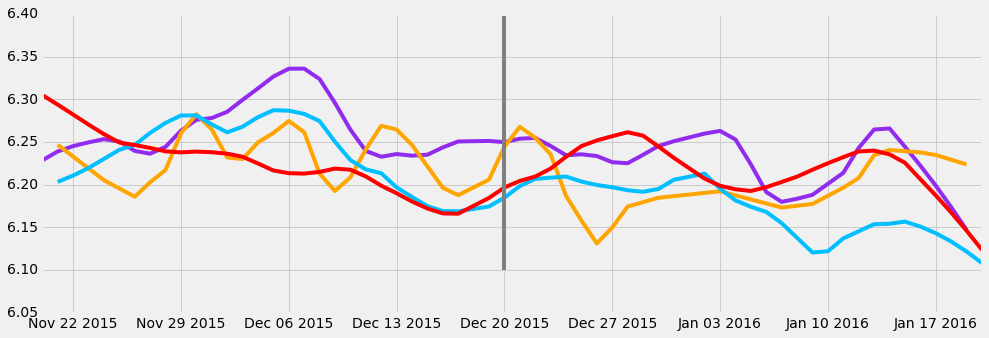

In [164]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def plot_valence(filename,color="blue",smoothing=2/3,print_points=True):
    df = pd.read_csv(filename[:-4]+"_formatted.csv",sep=separator_csv,index_col=index_col)
    df["Date_parsed"] = df["Date_parsed"].apply(lambda x: parse(x,yearfirst=True,dayfirst=dayfirst))
    df = df.loc[df["Valence"]>0,:]
    
    df = df.groupby("Date_parsed").mean().reset_index()
    y = lowess(df["Valence"],df["Date_parsed"],frac=smoothing,return_sorted=False)
    plt.plot(df["Date_parsed"],y,color=color)
    if print_points:
        plt.plot(df["Date_parsed"],df["Valence"],"o",color=color)

print_points = False
smoothing = 0.2

plt.figure(figsize=(15,5))
filename = "./data/Pablo_Iglesias_Podemos.csv"
plot_valence(filename,color="#912CEE",smoothing=smoothing,print_points=print_points)

filename = "./data/Albert_Rivera_Ciudadanos.csv"
plot_valence(filename,color="orange",smoothing=smoothing,print_points=print_points)

filename = "./data/Mariano_Rajoy_PP.csv"
plot_valence(filename,color="#00BFFF",smoothing=smoothing,print_points=print_points)

filename = "./data/Pedro_Sanchez_PSOE.csv"
plot_valence(filename,color="red",smoothing=smoothing,print_points=print_points)

elections = parse("Dec 20, 2015")
plt.plot([elections,elections],[6.1,6.4],color="grey")
plt.show()